# Calculation general CME distributions in $\beta$

\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi]}\sin\theta d\theta d\phi  \rho (\alpha(\theta, \phi)) \int \sin\theta' d\theta' \int d\phi' \rho^{CME}(\theta') \delta(\beta -\arccos ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

In [1]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt


In [2]:
# general distribution of active regions per unit area 
def rice_dist(x, sigma, nu):
    x = np.abs(x)
    return x / sigma**2 * np.exp( - (x**2 + nu **2 ) / (2 * sigma **2)) * sc.iv(0, (x * nu / sigma**2))

sigma_fit, nu_fit = (9.02769086 / 180 * np.pi, 10.48768514 / 180 * np.pi)

def rho(alpha, err=0.001):
    return rice_dist(np.pi / 2 - alpha, sigma_fit, nu_fit) / 2 / np.pi / (np.sin(alpha) + err) / 2 
            # fit of dist when integrated over phi and absolute value so accounting for that

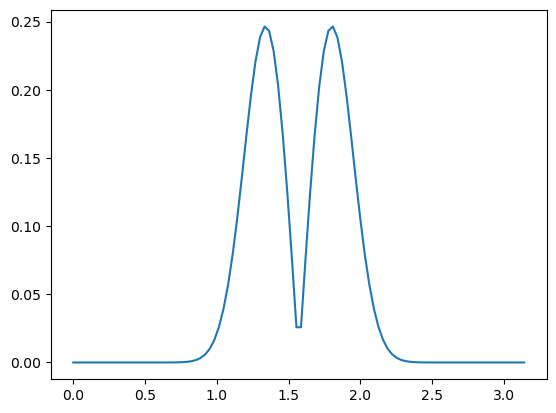

In [3]:
alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))

In [4]:
f = lambda x: rice_dist(x, sigma_fit, nu_fit)

from scipy.integrate import quad

quad(f,0, np.pi)

(1.0, 2.5350408352359244e-09)

Before for flare distribution we had
$$
\cos \alpha = \sin \tau \sin \theta \cos \phi +\cos \theta \cos \tau  $$
and $\mu = \cos \theta$

Now we have $\beta \sim \alpha, \theta \sim \tau, \theta'\sim \theta$ and $ \phi'\sim \phi$ so  
$$
\cos \beta = \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta  $$

The distribution for CME angle, properly normalized!

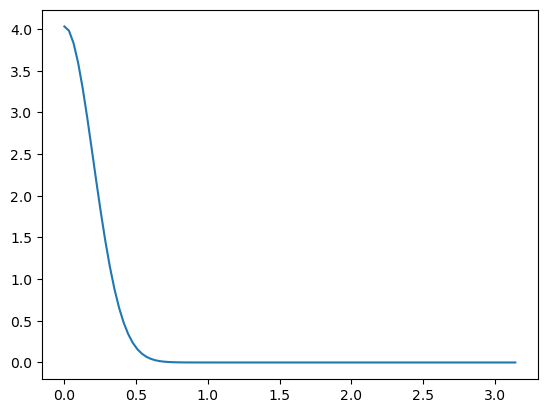

In [5]:
from scipy.stats import norm
# normalization, later to be determined
N = 1

def rho_CME(theta2, loc=0, scale = 0.2):
    return norm.pdf(theta2, loc, scale) /N

f = lambda theta2 : rho_CME(theta2) * np.sin(theta2) * 2 * np.pi


N = quad(f, 0, np.pi/2)[0]

T = np.linspace(0, np.pi, 100)
plt.plot(T, rho_CME(T))



In [ ]:
# general distribution for given tau
def get_sinphi2(theta, phi, theta2, beta):
    cosphi2 = np.cos(beta) / (np.sin(theta)*np.sin(theta2)) - np.cot(theta)*np.cot(theta2)
    return 0 if np.abs(cosphi2) >1 else (1-cosphi2**2)**0.5

def get_alpha(tau, theta, phi):
    return np.arccos( np.sin( tau ) * np.sin(theta) * np.cos(phi) + np.cos(tau) * np.cos(theta))



def f_integrand_(beta, tau, vec=True):
    if vec:
        def integrand_vec(x):
            theta = x[0]
            phi = x[1]
            theta2 = x[2]
            return integrand(theta, phi, theta2, beta, tau)
        return integrand_vec
    else:
        def integrand2(theta, phi, theta2):
            return integrand(theta, phi, theta2, beta, tau)
        return integrand2

def integrand(theta, phi, theta2, beta, tau):
    sinphi2 = get_sinphi2(theta, phi, theta2, beta)
    alpha = get_alpha(tau, theta, phi)
        
    return np.sin(theta)**2 * rho(alpha) * np.sin(theta2)**2 * rho_CME(theta2) * sinphi2 / np.abs(np.sin(beta))


If all integrations can be done at once this will save much time!
\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi]}\sin\theta d\theta d\phi  \rho (\alpha(\theta, \phi)) \int \sin\theta' d\theta' \int d\phi' \rho^{CME}(\theta') \delta(\beta -\arccos ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] \times [0,2\pi ]}d\theta d\phi d\theta' d\phi' \sin\theta   
    \rho (\alpha(\theta, \phi)) \sin\theta'  \rho^{CME}(\theta') \delta(\beta -\arccos ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

so we use $\cos \beta = \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta$, or equivalently that
$$\cos \phi' = \frac{\cos\beta - \cos\theta'\cos\theta}{\sin \theta'\sin\theta}$$ 
to find that 


\begin{equation}
    \int d\phi'   \delta(\beta -\arccos ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta)) = \frac{\sin\theta\sin\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}
since $\int dx \delta(f(x)) = \int dy (f'(x))^{-1} \delta(y) = 1/f'(x_0)$ where $y=f(x)$ and  $x_0$ such that $y=f(x_0)=0$.

Therefore 
\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'  \sin\theta   
    \rho (\alpha(\theta, \phi)) \sin\theta'  \rho^{CME}(\theta')  \frac{\sin\theta\sin\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}

\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'   
    \rho (\alpha(\theta, \phi))   \rho^{CME}(\theta')  \frac{\sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}




This calculation will take a while.

or different approach might be faster? $\phi'$ taken to be a function? 


If all integrations can be done at once this will save much time!
\begin{equation}
    \rho_{\cos\beta}(\cos\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi]}\sin\theta d\theta d\phi  \rho (\alpha(\theta, \phi)) \int \sin\theta' d\theta' \int d\phi' \rho^{CME}(\theta') \delta(\cos\beta -( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

\begin{equation}
    \rho_{\cos\beta}(\cos\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] \times [0,2\pi ]}d\theta d\phi d\theta' d\phi' \sin\theta   
    \rho (\alpha(\theta, \phi)) \sin\theta'  \rho^{CME}(\theta') \delta(\cos\beta - ( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta))
\end{equation}

so we use $\cos \beta = \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta$, or equivalently that
$$\cos \phi' = \frac{\cos\beta - \cos\theta'\cos\theta}{\sin \theta'\sin\theta}$$ 
to find that 


\begin{equation}
    \int d\phi'   \delta(\cos\beta -( \sin \theta \sin \theta' \cos \phi' +\cos \theta' \cos \theta)) = \sin\theta\sin\theta'\sin\phi'(\theta, \theta',\beta)
\end{equation}
since $\int dx \delta(f(x)) = \int dy (f'(x))^{-1} \delta(y) = 1/f'(x_0)$ where $y=f(x)$ and  $x_0$ such that $y=f(x_0)=0$.

Therefore 
\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'  \sin\theta   
    \rho (\alpha(\theta, \phi)) \sin\theta'  \rho^{CME}(\theta')  \frac{\sin\theta\sin\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}

\begin{equation}
    \rho_\beta(\beta) = \frac{1}{N} \int_{[0,\pi] \times [0,2\pi] \times [0,\pi] }d\theta d\phi d\theta'   
    \rho (\alpha(\theta, \phi))   \rho^{CME}(\theta')  \frac{\sin^2\theta\sin^2\theta'\sin\phi'(\theta, \theta',\beta)}{|\sin\beta|}
\end{equation}




This calculation will take a while.

or different approach might be faster? $\phi'$ taken to be a function? 


In [32]:
###
# fast is keyword for fast monte-carlo simulation vs thorough numerical integration
# fast = True is monte-carlo using package mcint
# fast = False is using scipy.integrade.nquad
fast = False

1.0760392784003123e-09
7.559981813720416e-10
1.0408285641184428e-10
5.191150623855262e-13
1.0913558088666474e-13
2.3987907299667266e-12
4.641424491543315e-11
1.9473730060927326e-09
1.8969068841609314e-08
2.578344367642316e-07
3.4547672185210513e-06
1.2208895041794492e-05
2.943303962342809e-05
9.634412279433175e-05
0.000294080457149109
0.0008550810156308651
0.0017397877674111485
0.0020511219075867106
0.0017042884190070042
0.0014891344674620697
[0.         0.08267349 0.16534698 0.24802047 0.33069396 0.41336745
 0.49604095 0.57871444 0.66138793 0.74406142 0.82673491 0.9094084
 0.99208189 1.07475538 1.15742887 1.24010236 1.32277585 1.40544935
 1.48812284 1.57079633] [-1.344928876207425e-09, -1.3669564278378862e-09, -1.6679998092422797e-10, -9.128367534346705e-13, 2.1719875917875767e-13, 2.293787327936944e-12, 7.083667012896963e-11, 3.038302756134317e-09, 2.3003472437013827e-08, 4.695716068948773e-07, 6.984408285359941e-06, 1.8423632625190365e-05, 6.02655523848011e-05, 0.0001934978679701104

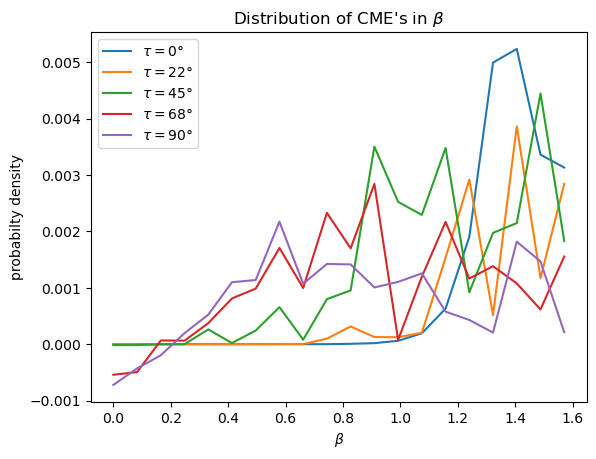

In [ ]:
import time
import mcint
import random
import math

def sampler():
    while True:
        theta     = random.uniform(0, np.pi)
        phi  = random.uniform(0, 2*np.pi)
        theta2    = random.uniform(0, np.pi/2)
    
        yield (theta, phi, theta2)

def get_rho_beta(beta, tau, fast=True):
    if fast:
        result, error = mcint.integrate(f_integrand_(beta, tau), sampler(), measure=1, n=10000)
        print(error)
    else:
        start_time = time.time()
        print(beta, tau, end='\r')
        result, error = integrate.nquad(f_integrand_(beta, tau, vec=False), [[0, np.pi],       # theta, phi, theta2
                                                    [0, 2*np.pi],         # phi
                                                    [0, np.pi / 2 ]])        # theta2
        end_time = time.time()
        print(f'For params {beta=}, {tau = } we find the distibution to be {result}, with estimated error {error}. \
            Taking {(end_time-start_time):.2f} to calculate.')

    return result


def rho_betas(betas, tau, fast=True):
    return [get_rho_beta(beta, tau, fast) for beta in betas]

betas = np.linspace(0,np.pi/2, 20)

for tau in np.linspace(0,np.pi/2, 5):
    a = rho_betas(betas, tau, fast)
    plt.plot(betas, a, label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(betas, a)

# plt.ylim(0,5)
plt.title(r"Distribution of CME's in $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel("probabilty density")
plt.legend()

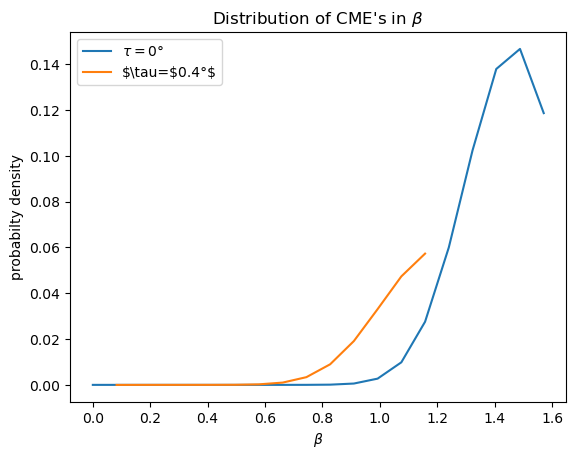

In [28]:
# partial results after 40 min of fast=False integration

b = np.array([0.         , 0.08267349 , 0.16534698 , 0.24802047, 0.33069396 , 0.41336745, 0.49604095 , 0.57871444 , 0.66138793 , 0.74406142, 0.82673491, 0.9094084, 0.99208189 , 1.07475538 , 1.15742887 , 1.24010236 , 1.32277585 , 1.40544935, 1.48812284 , 1.57079633])
p1=np.array([-1.244302803098822e-07, -2.020597301041954e-08, -2.9419197471627263e-09, -3.8506323427838335e-10, -3.9187265313228005e-11, 1.9396522511149444e-10, 4.663246386506073e-09, 8.342455036253888e-08, 1.1389400438405107e-06, 1.1879469422441976e-05, 9.478730484257619e-05, 0.0005795594748075021, 0.0027215705946284224, 0.009845515893399727, 0.027552861542427205, 0.059989051795611634, 0.10235890555562867, 0.13789471596377173, 0.1466504419075839, 0.11862377157730396])

b2 = [0.08267349088394192, 0.16534698176788384, 0.24802047265182575, 0.3306939635357677, 0.4133674544197096, 0.4960409453036515, 0.5787144361875934, 0.6613879270715354, 0.7440614179554773, 0.8267349088394192, 0.9094083997233612, 0.992081890607303,  1.074755381491245,  1.1574288723751869]
p2 = [ -2.22823150296887e-05, -5.713519770368957e-06, -1.3154789700561033e-06 -2.291901862322346e-07, 5.214006036830509e-07,  5.532554756659216e-06,  4.068847682634011e-05,  0.00022888900934754633,  0.0009946273992843017, 0.0033683418491653166, 0.008984065218520531, 0.019127553436737478,0.033065651186741915, 0.047353504995598206,  0.05729989712276298]


plt.plot(b, p1, label=fr'$\tau=$0°')
plt.plot(b2, p2, label=fr'$\tau=$0.4°$')

# plt.ylim(0,5)
plt.title(r"Distribution of CME's in $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel("probabilty density")
plt.legend()

In [41]:
import numpy as np
from scipy import integrate
import threading

n = 10
m = 2
betas = np.linspace(0,np.pi/2, n)
taus = np.linspace(0,np.pi/2, m)

bb,tt = np.meshgrid(betas, taus)

if 'I' not in globals() or I.shape != (n,m):
    I = np.zeros((n,m))



def caclulate_(i,j):
    if I[i,j] == 0:
        beta = betas[i]
        tau = taus[j]
        I[i,j] = get_rho_beta(beta, tau, fast)

threads = []

for i in range(n):
    for j in range(m):
        # Create and start a thread for each file download
        thread = threading.Thread(target=caclulate_, args=(i,j))
        thread.start()
        threads.append(thread)



        # # Same logic as before to retrieve directory listing (potentially)
        # # ... (code omitted for brevity)

        # # Iterate over retrieved content and create download threads
        # for i in range(779, 812, 1):
        #     filename = i_filename(i)
        #     download_url = f"{url}/{filename}"

        #     # Acquire the semaphore before creating a thread
        #     semaphore.acquire()

            

        #     # Release the semaphore after starting the thread
        #     semaphore.release()

# Wait for all threads to finish
for thread in threads:
    thread.join(timeout=5)
    
    if thread.is_alive():
        print("Integration timed out.")
        # Optionally, you can handle the timeout here
    else:
        print("Integration completed.")

#     except (HTTPError, URLError) as error:
#         print(f"Error downloading files: {error}")

# # Create a thread for the integration
# thread = threading.Thread(target=integrate_function)
# thread.start()

# # Wait for the thread to complete with a timeout
# thread.join(timeout=5)  # Timeout after 5 seconds

I

Integration timed out.7079632679489666
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.
Integration timed out.


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

For params beta=0.17453292519943295, tau = 0.0 we find the distibution to be -2.3541781946664375e-09, with estimated error 1.4491646399722605e-08.             Taking 131.94 to calculate.
For params beta=0.3490658503988659, tau = 0.0 we find the distibution to be -1.383426801365436e-11, with estimated error 1.8734944927856898e-10.             Taking 135.77 to calculate.
For params beta=0.5235987755982988, tau = 0.0 we find the distibution to be 1.2569240022356042e-08, with estimated error 1.2353115481876258e-08.             Taking 154.97 to calculate.


In [ ]:
import numpy as np
from scipy import integrate
import threading

n = 10
m = 2
betas = np.linspace(0,np.pi/2, n)
taus = np.linspace(0,np.pi/2, m)

bb,tt = np.meshgrid(betas, taus)

if 'I' not in globals():
    I = np.zeros((n,m))

or I.shape() != (n,m)

def caclulate_(i,j):
    if I[i,j] == 0:
        beta = betas[i]
        tau = taus[j]
        I[i,j] = get_rho_beta(beta, tau, fast)

threads = []

for i in range(n):
    for j in range(m):
        # Create and start a thread for each file download
        thread = threading.Thread(target=caclulate_, args=(i,j))
        thread.start()
        threads.append(thread)



        # # Same logic as before to retrieve directory listing (potentially)
        # # ... (code omitted for brevity)

        # # Iterate over retrieved content and create download threads
        # for i in range(779, 812, 1):
        #     filename = i_filename(i)
        #     download_url = f"{url}/{filename}"

        #     # Acquire the semaphore before creating a thread
        #     semaphore.acquire()

            

        #     # Release the semaphore after starting the thread
        #     semaphore.release()

# Wait for all threads to finish
for thread in threads:
    thread.join(timeout=5)
    
    if thread.is_alive():
        print("Integration timed out.")
        # Optionally, you can handle the timeout here
    else:
        print("Integration completed.")

#     except (HTTPError, URLError) as error:
#         print(f"Error downloading files: {error}")

# # Create a thread for the integration
# thread = threading.Thread(target=integrate_function)
# thread.start()

# # Wait for the thread to complete with a timeout
# thread.join(timeout=5)  # Timeout after 5 seconds

I

TypeError: 'tuple' object is not callable

In [ ]:
import numpy as np
from scipy import integrate
import threading

n = 10
m = 2
betas = np.linspace(0,np.pi/2, n)
taus = np.linspace(0,np.pi/2, m)

bb,tt = np.meshgrid(betas, taus)

if 'I' not in globals():
    I = np.zeros((n,m))

or I.shape() != (n,m)

def caclulate_(i,j):
    if I[i,j] == 0:
        beta = betas[i]
        tau = taus[j]
        I[i,j] = get_rho_beta(beta, tau, fast)

threads = []

for i in range(n):
    for j in range(m):
        # Create and start a thread for each file download
        thread = threading.Thread(target=caclulate_, args=(i,j))
        thread.start()
        threads.append(thread)



        # # Same logic as before to retrieve directory listing (potentially)
        # # ... (code omitted for brevity)

        # # Iterate over retrieved content and create download threads
        # for i in range(779, 812, 1):
        #     filename = i_filename(i)
        #     download_url = f"{url}/{filename}"

        #     # Acquire the semaphore before creating a thread
        #     semaphore.acquire()

            

        #     # Release the semaphore after starting the thread
        #     semaphore.release()

# Wait for all threads to finish
for thread in threads:
    thread.join(timeout=5)
    
    if thread.is_alive():
        print("Integration timed out.")
        # Optionally, you can handle the timeout here
    else:
        print("Integration completed.")

#     except (HTTPError, URLError) as error:
#         print(f"Error downloading files: {error}")

# # Create a thread for the integration
# thread = threading.Thread(target=integrate_function)
# thread.start()

# # Wait for the thread to complete with a timeout
# thread.join(timeout=5)  # Timeout after 5 seconds

I

TypeError: 'tuple' object is not callable

In [ ]:
import numpy as np
from scipy import integrate
import threading

n = 10
m = 2
betas = np.linspace(0,np.pi/2, n)
taus = np.linspace(0,np.pi/2, m)

bb,tt = np.meshgrid(betas, taus)

if 'I' not in globals():
    I = np.zeros((n,m))

or I.shape() != (n,m)

def caclulate_(i,j):
    if I[i,j] == 0:
        beta = betas[i]
        tau = taus[j]
        I[i,j] = get_rho_beta(beta, tau, fast)

threads = []

for i in range(n):
    for j in range(m):
        # Create and start a thread for each file download
        thread = threading.Thread(target=caclulate_, args=(i,j))
        thread.start()
        threads.append(thread)



        # # Same logic as before to retrieve directory listing (potentially)
        # # ... (code omitted for brevity)

        # # Iterate over retrieved content and create download threads
        # for i in range(779, 812, 1):
        #     filename = i_filename(i)
        #     download_url = f"{url}/{filename}"

        #     # Acquire the semaphore before creating a thread
        #     semaphore.acquire()

            

        #     # Release the semaphore after starting the thread
        #     semaphore.release()

# Wait for all threads to finish
for thread in threads:
    thread.join(timeout=5)
    
    if thread.is_alive():
        print("Integration timed out.")
        # Optionally, you can handle the timeout here
    else:
        print("Integration completed.")

#     except (HTTPError, URLError) as error:
#         print(f"Error downloading files: {error}")

# # Create a thread for the integration
# thread = threading.Thread(target=integrate_function)
# thread.start()

# # Wait for the thread to complete with a timeout
# thread.join(timeout=5)  # Timeout after 5 seconds

I

TypeError: 'tuple' object is not callable

In [ ]:

for j in range(m):
    plt.plot(betas, I[:,j], label=fr'$\tau=${round(taus[j]*180/np.pi)}°')
    

# plt.ylim(0,5)
plt.title(r"Distribution of CME's in $\beta$")
plt.xlabel(r"$\beta$")
plt.ylabel("probabilty density")
plt.legend()

<!-- # Other distributions:
## Normal around the equatator -->